In [ ]:
!pip install datatable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96.6 MB 1.2 MB/s 


In [ ]:
!pip install Sentencepiece
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 7.9 MB/s 
     |████████████████████████████████| 7.6 MB 43.9 MB/s 
     |████████████████████████████████| 182 kB 9.0 MB/s 


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import tensorflow_hub as hub
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
import datatable as dt
import unicodedata
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import string
# ignoring all the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
url = 'https://raw.githubusercontent.com/JovitaBer/sentiment/main/filename.csv?token=GHSAT0AAAAAAB3FZW3XQRXVX44CDUBRPFGAY3SODRA'
data = pd.read_csv(url, encoding = 'unicode_escape')

## Defined functions

- strip emoji

In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

## Start Exploring DataSet

In [ ]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [ ]:
df = data[['id', 'username', 'created_at','tweet','language']]
df.set_index('id', inplace=True)

In [ ]:
df["language"].value_counts()

en     8825
pt      372
it      233
qme     110
in       78
und      68
es       47
ru       33
th       29
fr       28
de       23
vi       20
ja       19
ca       18
ro       15
qht      12
fi       12
ar       11
tl        9
nl        7
uk        7
pl        6
qam       4
hi        4
zh        3
cs        2
et        2
iw        2
tr        2
fa        2
sl        1
zxx       1
el        1
ht        1
ko        1
da        1
bg        1
hu        1
Name: language, dtype: int64

In [ ]:
df.isnull().sum()

username      0
created_at    0
tweet         0
language      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,username,created_at,tweet,language
id,,,,
1591599653354868737,aldieramarket,2022-11-13 01:11:42+00:00,Update from Ukraine - Russia Unveils Its New F...,en
1591599650188185600,yarema9,2022-11-13 01:11:41+00:00,@NorburyKaz It could have been tit for tat. I...,en
1591599647503556609,fito_fernando,2022-11-13 01:11:41+00:00,@Natkor7 Russia should bomb Ukraine ez https:...,en
1591599638284570624,brasil_livre,2022-11-13 01:11:38+00:00,"Em 'dia histÃ³rico', ucranianos celebram recon...",pt
1591599630701076480,arnogosse,2022-11-13 01:11:37+00:00,"On February 24, Russia launched an invasion #å...",en


### Language Analysis

In [ ]:
language_df = pd.DataFrame(df['language'].value_counts().reset_index().values, columns=['language', 'total'])

In [ ]:
df = df.query('language == "en" or language == "uk"') # English language Tweets comprise greatest dataset

In [ ]:
df['language'].value_counts() # confirm only English-language Tweets remain.

en    8825
uk       7
Name: language, dtype: int64

## Clean & Stem The Tweets

## 1. Low Cleaning df['tweet_simple_clean']

In [ ]:
def clean_tweet(text):
    text = str(text).lower() # lowercase the text
    text = ' '.join([word for word in text.split() if not word.startswith('@')]) # get rid of usernames
    text = ' '.join([word for word in text.split() if not word.startswith('#')]) # get rid of hashtags
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove urls
    text = BeautifulSoup(text, 'html.parser').string # parse any html and return it as a string
    if text is None:
        return ''
    text = re.sub('\[.*?\]', '', text)
    text = remove_emojis(text) # get rid of emojis
    text = re.sub('\n', '', text) # drop all line feeds
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation . , ! ?
    # Remove all the special characters
    text = re.sub(r'\W', ' ', str(text))
 
    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
 
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
    text = re.sub(r'â', ' ', text)
    text = re.sub(r'ð', ' ', text)
    text = re.sub(r'º', ' ', text)
 
    # Substituting multiple spaces with single space
    text= re.sub(r'\s+', ' ', text, flags=re.I)
 
    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    while text.find('  ') != -1:
        text = re.sub('\s\s', ' ', text) # strip double spaces
    return text.strip()

In [ ]:
df['tweet'].iloc[8831] # pre-cleaned tweet

'@FoxNews Do you mean he is the new â\x80\x9cNew Russia ð\x9f\x87·ð\x9f\x87º Partyâ\x80\x9d leader?'

In [ ]:
stopword=set(stopwords.words('english'))

In [ ]:
df['tweet_simple_clean'] = df['tweet'].apply(clean_tweet)

In [ ]:
df['tweet_simple_clean'].iloc[8831] # tweet after cleaning

'do you mean he is the new new russia party leader'

In [ ]:
df['tweet'].iloc[47] # pre-cleaned tweet

'@spann_laura @GabbyGirl0409 @TravisAllen02 @GovRonDeSantis Oil and gas production. Once again, we own the supplies. You can call russia maybe?  https://t.co/5q7heT3p2e'

In [ ]:
df['tweet_simple_clean'].iloc[47] # pre-cleaned tweet

'oil and gas production once again we own the supplies you can call russia maybe'

## 2. Medium Cleaning df['tweet_no_stopwords']

In [ ]:
stop = stopwords.words('english') #Remove stopwords (and, or...)
df['tweet_no_stopwords'] = df['tweet_simple_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweet_no_stopwords'].head()


id
1591599653354868737    update ukraine russia unveils new fighting pla...
1591599650188185600    could tit tat israel refused provide lethal we...
1591599647503556609                               russia bomb ukraine ez
1591599630701076480                 february 24 russia launched invasion
1591599629954875392                   disabilities struggle leave russia
Name: tweet_no_stopwords, dtype: object

In [ ]:
df['tweet_simple_clean'].iloc[40]

'a former soviet state on russia border would have no way to generate war effort propaganda without us help country who president owns his own successful tv production company would feel lost wondering how to bolster his country folk moral with reporters all around'

In [ ]:
df['tweet_no_stopwords'].iloc[40] # tweet after cleaning

'former soviet state russia border would way generate war effort propaganda without us help country president owns successful tv production company would feel lost wondering bolster country folk moral reporters around'

## 3. High Cleaning df['tweet_high_clean']

NLTK Lemmatization is the process of grouping the inflected forms of a word in order to analyze them as a single word in linguistics.Unlike stemming, lemmatization uses the part of speech tags and the meaning of the word in the sentence to see the main context of the document. Thus, NLTK Lemmatization is important for understanding a text and using it for Natural Language Processing, and Natural Language Understanding practices. https://www.holisticseo.digital/python-seo/nltk/lemmatize

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):

    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_sentence = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df['tweet_high_clean'] = df['tweet_no_stopwords'].apply(lemmatize_sentence)

In [ ]:
df['tweet_no_stopwords'].iloc[47]

'oil gas production supplies call russia maybe'

In [ ]:
df['tweet_high_clean'].iloc[47] # tweet after cleaning

'oil gas production supply call russia maybe'

In [ ]:
df['tweet_no_stopwords'].iloc[40]

'former soviet state russia border would way generate war effort propaganda without us help country president owns successful tv production company would feel lost wondering bolster country folk moral reporters around'

In [ ]:
df['tweet_high_clean'].iloc[40]

'former soviet state russia border would way generate war effort propaganda without us help country president own successful tv production company would feel lose wondering bolster country folk moral reporter around'

## Classify Sentiment

### Scoring tweets with simple cleaning

In [ ]:
sentiments = SentimentIntensityAnalyzer()

df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['tweet_simple_clean']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['tweet_simple_clean']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['tweet_simple_clean']]
df['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in df['tweet_simple_clean']]

In [ ]:
print(df['tweet_simple_clean'].iloc[47],'\n',df['Compound'].iloc[47])

oil and gas production once again we own the supplies you can call russia maybe 
 0.0


In [ ]:
def classify_sentiment(row):
    classify = 'Neutral'
    if row['Compound'] >= 0.05:
        classify = 'Positive'
    elif row['Compound'] <= -0.05:
        classify = 'Negative'
    return classify

In [ ]:
df['Sentiment'] = df.apply(classify_sentiment, axis=1)

In [ ]:
pos = df['Sentiment'][df['Sentiment'] == 'Positive'].count()
neg = df['Sentiment'][df['Sentiment'] == 'Negative'].count()
neu = df['Sentiment'][df['Sentiment'] == 'Neutral'].count()
df['Sentiment'].value_counts()

Negative    4209
Positive    2795
Neutral     1828
Name: Sentiment, dtype: int64

In [ ]:
print('Ratio of Negative to Positive Tweets by Sentiment Count: {:.0f}:{:.0f} ({:.2f}:1)'.format(neg, pos, neg / pos))

Ratio of Negative to Positive Tweets by Sentiment Count: 4209:2795 (1.51:1)


In [ ]:
possible_label = df.Sentiment.unique()
dict_label = {}
for index,possible_label in enumerate(possible_label):
    dict_label[possible_label] = index
dict_label

{'Negative': 0, 'Positive': 1, 'Neutral': 2}

In [ ]:
df["Label"] = df["Sentiment"].replace(dict_label)

In [ ]:
df

,username,created_at,tweet,language,tweet_simple_clean,tweet_no_stopwords,tweet_high_clean,Positive,Neutral,Negative,Compound,Sentiment,Label
id,,,,,,,,,,,,,
1591599653354868737,aldieramarket,2022-11-13 01:11:42+00:00,Update from Ukraine - Russia Unveils Its New F...,en,update from ukraine russia unveils its new fig...,update ukraine russia unveils new fighting pla...,update ukraine russia unveils new fighting pla...,0.000,0.641,0.359,-0.6808,Negative,0
1591599650188185600,yarema9,2022-11-13 01:11:41+00:00,@NorburyKaz It could have been tit for tat. I...,en,it could have been tit for tat israel has refu...,could tit tat israel refused provide lethal we...,could tit tat israel refuse provide lethal wea...,0.097,0.730,0.172,-0.5736,Negative,0
1591599647503556609,fito_fernando,2022-11-13 01:11:41+00:00,@Natkor7 Russia should bomb Ukraine ez https:...,en,russia should bomb ukraine ez,russia bomb ukraine ez,russia bomb ukraine ez,0.287,0.345,0.368,-0.1779,Negative,0
1591599630701076480,arnogosse,2022-11-13 01:11:37+00:00,"On February 24, Russia launched an invasion #å...",en,on february 24 russia launched an invasion,february 24 russia launched invasion,february 24 russia launch invasion,0.200,0.800,0.000,0.1280,Positive,1
1591599629954875392,crichtonmamie,2022-11-13 01:11:36+00:00,disabilities struggle more to leave Russia #...,en,disabilities struggle more to leave russia,disabilities struggle leave russia,disability struggle leave russia,0.000,0.514,0.486,-0.4173,Negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591547887095533570,txrednecker,2022-11-12 21:46:00+00:00,@socialiststeve6 Funny when you look at the so...,en,funny when you look at the socialist countries...,funny look socialist countries world china nor...,funny look socialist country world china north...,0.294,0.706,0.000,0.8750,Positive,1
1591547869751820288,amerikkkakillz,2022-11-12 21:45:56+00:00,@_rcortney @JohnnySQL8 So is this the work of ...,en,so is this the work of military that commits w...,work military commits war crimes civilians don...,work military commits war crime civilian dont ...,0.033,0.848,0.118,-0.5859,Negative,0
1591547862571180032,thelighthnes,2022-11-12 21:45:54+00:00,@Gerashchenko_en russians in russia - blame US...,en,russians in russia blame us russians in englan...,russians russia blame us russians england blam...,russian russia blame us russian england blame ...,0.000,0.735,0.265,-0.7351,Negative,0


In [ ]:
pd.DataFrame(df.groupby(['Sentiment'])['Sentiment'].count()).rename(columns={"Sentiment":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

,Counts,Percentage
Sentiment,,
Negative,4209,47.656250
Neutral,1828,20.697464
Positive,2795,31.646286


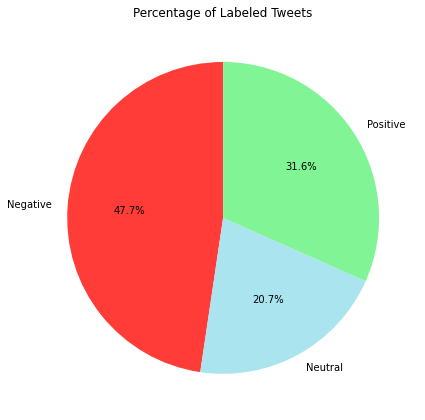

In [ ]:
x = pd.DataFrame(df.groupby(['Sentiment'])['Sentiment'].count()).rename(columns={"Sentiment":"Counts"})
labels = ['Negative','Neutral','Positive']
colors = ["#FF3C38","#A9E4EF","#81F495"]
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels=labels, autopct='%.1f%%', colors=colors, startangle=90)
ax.set_title("Percentage of Labeled Tweets")
plt.tight_layout()

## Bert

In [ ]:
df

,username,created_at,tweet,language,tweet_simple_clean,tweet_no_stopwords,tweet_high_clean,Positive,Neutral,Negative,Compound,Sentiment,Label
id,,,,,,,,,,,,,
1591599653354868737,aldieramarket,2022-11-13 01:11:42+00:00,Update from Ukraine - Russia Unveils Its New F...,en,update from ukraine russia unveils its new fig...,update ukraine russia unveils new fighting pla...,update ukraine russia unveils new fighting pla...,0.000,0.641,0.359,-0.6808,Negative,0
1591599650188185600,yarema9,2022-11-13 01:11:41+00:00,@NorburyKaz It could have been tit for tat. I...,en,it could have been tit for tat israel has refu...,could tit tat israel refused provide lethal we...,could tit tat israel refuse provide lethal wea...,0.097,0.730,0.172,-0.5736,Negative,0
1591599647503556609,fito_fernando,2022-11-13 01:11:41+00:00,@Natkor7 Russia should bomb Ukraine ez https:...,en,russia should bomb ukraine ez,russia bomb ukraine ez,russia bomb ukraine ez,0.287,0.345,0.368,-0.1779,Negative,0
1591599630701076480,arnogosse,2022-11-13 01:11:37+00:00,"On February 24, Russia launched an invasion #å...",en,on february 24 russia launched an invasion,february 24 russia launched invasion,february 24 russia launch invasion,0.200,0.800,0.000,0.1280,Positive,1
1591599629954875392,crichtonmamie,2022-11-13 01:11:36+00:00,disabilities struggle more to leave Russia #...,en,disabilities struggle more to leave russia,disabilities struggle leave russia,disability struggle leave russia,0.000,0.514,0.486,-0.4173,Negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591547887095533570,txrednecker,2022-11-12 21:46:00+00:00,@socialiststeve6 Funny when you look at the so...,en,funny when you look at the socialist countries...,funny look socialist countries world china nor...,funny look socialist country world china north...,0.294,0.706,0.000,0.8750,Positive,1
1591547869751820288,amerikkkakillz,2022-11-12 21:45:56+00:00,@_rcortney @JohnnySQL8 So is this the work of ...,en,so is this the work of military that commits w...,work military commits war crimes civilians don...,work military commits war crime civilian dont ...,0.033,0.848,0.118,-0.5859,Negative,0
1591547862571180032,thelighthnes,2022-11-12 21:45:54+00:00,@Gerashchenko_en russians in russia - blame US...,en,russians in russia blame us russians in englan...,russians russia blame us russians england blam...,russian russia blame us russian england blame ...,0.000,0.735,0.265,-0.7351,Negative,0


In [ ]:
!pip install transformers
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://www.kaggle.com/code/harshjain123/bert-for-everyone-tutorial-implementation 


### **Bert**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
batch_1 = df[:2000]

In [ ]:
batch_1

,username,created_at,tweet,language,tweet_simple_clean,tweet_no_stopwords,tweet_high_clean,Positive,Neutral,Negative,Compound,Sentiment,Label
id,,,,,,,,,,,,,
1591599653354868737,aldieramarket,2022-11-13 01:11:42+00:00,Update from Ukraine - Russia Unveils Its New F...,en,update from ukraine russia unveils its new fig...,update ukraine russia unveils new fighting pla...,update ukraine russia unveils new fighting pla...,0.000,0.641,0.359,-0.6808,Negative,0
1591599650188185600,yarema9,2022-11-13 01:11:41+00:00,@NorburyKaz It could have been tit for tat. I...,en,it could have been tit for tat israel has refu...,could tit tat israel refused provide lethal we...,could tit tat israel refuse provide lethal wea...,0.097,0.730,0.172,-0.5736,Negative,0
1591599647503556609,fito_fernando,2022-11-13 01:11:41+00:00,@Natkor7 Russia should bomb Ukraine ez https:...,en,russia should bomb ukraine ez,russia bomb ukraine ez,russia bomb ukraine ez,0.287,0.345,0.368,-0.1779,Negative,0
1591599630701076480,arnogosse,2022-11-13 01:11:37+00:00,"On February 24, Russia launched an invasion #å...",en,on february 24 russia launched an invasion,february 24 russia launched invasion,february 24 russia launch invasion,0.200,0.800,0.000,0.1280,Positive,1
1591599629954875392,crichtonmamie,2022-11-13 01:11:36+00:00,disabilities struggle more to leave Russia #...,en,disabilities struggle more to leave russia,disabilities struggle leave russia,disability struggle leave russia,0.000,0.514,0.486,-0.4173,Negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591587051639820288,nickdemersusa,2022-11-13 00:21:38+00:00,@mikepompeo The war in Ukraine is a ðºð¸ p...,en,the war in ukraine is proxy war against russia...,war ukraine proxy war russia led democrats act...,war ukraine proxy war russia lead democrat act...,0.023,0.689,0.288,-0.9287,Negative,0
1591587035290148865,humuhumu79,2022-11-13 00:21:34+00:00,@mfa_russia Traditional Russian Spiritual and ...,en,traditional russian spiritual and moral values...,traditional russian spiritual moral values sat...,traditional russian spiritual moral value sata...,0.055,0.530,0.415,-0.9623,Negative,0
1591587012506697733,labmom32136,2022-11-13 00:21:28+00:00,"@AdamParkhomenko Geez, I hope you are correct....",en,geez hope you are correct can kari see russia ...,geez hope correct kari see russia home,geez hope correct kari see russia home,0.195,0.805,0.000,0.4404,Positive,1


In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')


# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenized = batch_1["tweet_simple_clean"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
padded

array([[  101, 10651,  2013, ...,     0,     0,     0],
       [  101,  2009,  2071, ...,     0,     0,     0],
       [  101,  3607,  2323, ...,     0,     0,     0],
       ...,
       [  101, 20277,  2480, ...,     0,     0,     0],
       [  101,  2204,  6735, ...,     0,     0,     0],
       [  101,  2065,  3607, ...,     0,     0,     0]])

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(2000, 85)

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch_1['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                   random_state=100,
                                                    stratify=labels)

Bert with Logistic regression without fine-tunning

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train, y_train)
predictions = lr_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score

print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[133  30  10]
 [ 53  73  11]
 [ 13  11  66]]
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       173
           1       0.64      0.53      0.58       137
           2       0.76      0.73      0.75        90

    accuracy                           0.68       400
   macro avg       0.69      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400

Model evaluation
Accuracy: 0.68


Bert with Logistic regression with fine-tunning

In [ ]:
lr_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 8.4 MB/s 


In [ ]:
from skopt import BayesSearchCV
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params



KeyboardInterrupt: ignored

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Bert with XGBoost without fine-tunning

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb


xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
xgboost.score(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Bert with XGBoost with fine-tunning

In [ ]:
xgboost.get_params()

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params


In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Bert with Naïve Bayes without fine-tunning

In [ ]:
from sklearn.naive_bayes import GaussianNB
text_classifier = GaussianNB()
text_classifier.fit(X_train, y_train)
text_classifier.score(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Bert with Naïve Bayes with fine-tunning

In [ ]:
text_classifier.get_params()

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
 text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

**RoBerta**

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

In [ ]:
tokenized = batch_1["tweet_simple_clean"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])


In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch_1['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                   random_state=100,
                                                    stratify=labels)

Robert with logistic regression without fine-tunning.

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train, y_train)
predictions = lr_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Robert with logistic regression with fine-tunning.

In [ ]:
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Robert with XGBoost without fine-tuning. 

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
xgboost.score(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Robert with XGBoost with fine-tuning.

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Roberta with Naive Bayes without fine-tuning. 


In [ ]:
text_classifier = GaussianNB()
text_classifier.fit(X_train, y_train)
text_classifier.score(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Roberta with Naive Bayes with fine-tuning.

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

**Alberta**


In [ ]:
from transformers import AlbertTokenizer, AlbertModel
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v1')
model = AlbertModel.from_pretrained("albert-base-v1")

In [ ]:
tokenized = batch_1["tweet_simple_clean"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])


In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch_1['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                   random_state=100,
                                                    stratify=labels)

Albert with logistic regression without fine-tuning. 



In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train, y_train)
predictions = lr_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with logistic regression with fine-tuning. 


In [ ]:
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with XGBoost without fine-tuning.

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
xgboost.score(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with XGBoost with fine-tuning.

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with Naive Bayes without fine-tuning. 

In [ ]:
text_classifier = GaussianNB()
text_classifier.fit(X_train, y_train)
text_classifier.score(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with Naive Bayes with fine-tuning. 

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))



---



**BERT, Robert and Albert** 
- Classification models with fine-tuning on **tweet_high_clean**

**BERT**

In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')


# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenized = batch_1["tweet_high_clean"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
padded

array([[  101, 10651,  2013, ...,     0,     0,     0],
       [  101,  2009,  2071, ...,     0,     0,     0],
       [  101,  3607,  2323, ...,     0,     0,     0],
       ...,
       [  101, 20277,  2480, ...,     0,     0,     0],
       [  101,  2204,  6735, ...,     0,     0,     0],
       [  101,  2065,  3607, ...,     0,     0,     0]])

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(2000, 85)

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch_1['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                   random_state=100,
                                                    stratify=labels)

Bert and **Logistic Regression** with tuning on tweet_high_clean

In [ ]:
from skopt import BayesSearchCV
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params



KeyboardInterrupt: ignored

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Bert with **XGBoost** with fine-tunning on tweet_high_clean

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params


In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Bert with **Naïve Bayes** with fine-tunning

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
 text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))



---



**ROBERT**

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

In [ ]:
tokenized = batch_1["tweet_high_clean"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])


In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch_1['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                   random_state=100,
                                                    stratify=labels)

RoBert and **Logistic Regression** with tuning on tweet_high_clean

In [ ]:
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

RoBert with **XGBoost** with fine-tunning on tweet_high_clean

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

RoBert with **Naïve Bayes** with fine-tunning

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))



---



**ALBERT**

In [ ]:
from transformers import AlbertTokenizer, AlbertModel
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v1')
model = AlbertModel.from_pretrained("albert-base-v1")

In [ ]:
tokenized = batch_1["tweet_high_clean"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])


In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = batch_1['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                   random_state=100,
                                                    stratify=labels)

Albert and **Logistic Regression** with tuning on tweet_high_clean

In [ ]:
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with **XGBoost** with fine-tunning on tweet_high_clean

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

Albert with **Naïve Bayes** with fine-tunning

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

## Feature extraction 

**TF-IDF**


---



In [ ]:
df

,username,created_at,tweet,language,tweet_simple_clean,tweet_no_stopwords,tweet_high_clean,Positive,Neutral,Negative,Compound,Sentiment,Label
id,,,,,,,,,,,,,
1591599653354868737,aldieramarket,2022-11-13 01:11:42+00:00,Update from Ukraine - Russia Unveils Its New F...,en,update from ukraine russia unveils its new fig...,update ukraine russia unveils new fighting pla...,update ukraine russia unveils new fighting pla...,0.000,0.641,0.359,-0.6808,Negative,0
1591599650188185600,yarema9,2022-11-13 01:11:41+00:00,@NorburyKaz It could have been tit for tat. I...,en,it could have been tit for tat israel has refu...,could tit tat israel refused provide lethal we...,could tit tat israel refuse provide lethal wea...,0.097,0.730,0.172,-0.5736,Negative,0
1591599647503556609,fito_fernando,2022-11-13 01:11:41+00:00,@Natkor7 Russia should bomb Ukraine ez https:...,en,russia should bomb ukraine ez,russia bomb ukraine ez,russia bomb ukraine ez,0.287,0.345,0.368,-0.1779,Negative,0
1591599630701076480,arnogosse,2022-11-13 01:11:37+00:00,"On February 24, Russia launched an invasion #å...",en,on february 24 russia launched an invasion,february 24 russia launched invasion,february 24 russia launch invasion,0.200,0.800,0.000,0.1280,Positive,1
1591599629954875392,crichtonmamie,2022-11-13 01:11:36+00:00,disabilities struggle more to leave Russia #...,en,disabilities struggle more to leave russia,disabilities struggle leave russia,disability struggle leave russia,0.000,0.514,0.486,-0.4173,Negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591547887095533570,txrednecker,2022-11-12 21:46:00+00:00,@socialiststeve6 Funny when you look at the so...,en,funny when you look at the socialist countries...,funny look socialist countries world china nor...,funny look socialist country world china north...,0.294,0.706,0.000,0.8750,Positive,1
1591547869751820288,amerikkkakillz,2022-11-12 21:45:56+00:00,@_rcortney @JohnnySQL8 So is this the work of ...,en,so is this the work of military that commits w...,work military commits war crimes civilians don...,work military commits war crime civilian dont ...,0.033,0.848,0.118,-0.5859,Negative,0
1591547862571180032,thelighthnes,2022-11-12 21:45:54+00:00,@Gerashchenko_en russians in russia - blame US...,en,russians in russia blame us russians in englan...,russians russia blame us russians england blam...,russian russia blame us russian england blame ...,0.000,0.735,0.265,-0.7351,Negative,0


In [ ]:
tweets = df['tweet_simple_clean']
y = df['Sentiment']
print(tweets)

id
1591599653354868737    update from ukraine russia unveils its new fig...
1591599650188185600    it could have been tit for tat israel has refu...
1591599647503556609                        russia should bomb ukraine ez
1591599630701076480           on february 24 russia launched an invasion
1591599629954875392           disabilities struggle more to leave russia
                                             ...                        
1591547887095533570    funny when you look at the socialist countries...
1591547869751820288    so is this the work of military that commits w...
1591547862571180032    russians in russia blame us russians in englan...
1591547862026158080    dissolve g20 dissolve un dissolve nato dissolv...
1591547859178250241    do you mean he is the new new russia party leader
Name: tweet_simple_clean, Length: 8832, dtype: object


**Data Preprocessing**


---



**TF**  = (Frequency of a word in the document)/(Total words in the document)


---


**IDF** = Log((Total number of docs)/(Number of docs containing the word))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# import Naïve Bayes 
from sklearn.naive_bayes import GaussianNB

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import XGBoost
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
tfidf = TfidfVectorizer()

Classification models on **tweet_simple_clean**

In [ ]:
#Convert your dataset into corresponding TF-IDF feature vectors
X = tfidf.fit_transform( df['tweet_simple_clean']).toarray()
tfidf.get_feature_names_out()

array(['00', '000', '00003', ..., 'ï¼', 'ï½', 'ø³ø'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

TF-IDF and Naïve Bayes without fine-tuning on tweet_simple_clean



In [ ]:
text_classifier = GaussianNB()
text_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[451  71 304]
 [ 62 199  99]
 [191  83 307]]
              precision    recall  f1-score   support

    Negative       0.64      0.55      0.59       826
     Neutral       0.56      0.55      0.56       360
    Positive       0.43      0.53      0.48       581

    accuracy                           0.54      1767
   macro avg       0.55      0.54      0.54      1767
weighted avg       0.56      0.54      0.55      1767

Model evaluation
Accuracy: 0.5415959252971138


TF-IDF and Naïve Bayes with fine-tuning on tweet_simple_clean

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)TF-IDF and Naïve Bayes without fine-tuning on tweet_simple_clean
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

TF-IDF and Logistic Regression withuot fine-tuning on tweet_simple_clean


In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

In [ ]:
predictions = lg.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[731  22  73]
 [118 195  47]
 [216  27 338]]
              precision    recall  f1-score   support

    Negative       0.69      0.88      0.77       826
     Neutral       0.80      0.54      0.65       360
    Positive       0.74      0.58      0.65       581

    accuracy                           0.72      1767
   macro avg       0.74      0.67      0.69      1767
weighted avg       0.73      0.72      0.71      1767

Model evaluation
Accuracy: 0.7153367289190719


TF- IDF and Logistic Regression and fine-tuning on tweet_simple_clean


In [ ]:
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from skopt import BayesSearchCV
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params


OrderedDict([('C', 1.0)])

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[731  22  73]
 [118 195  47]
 [216  27 338]]
              precision    recall  f1-score   support

    Negative       0.69      0.88      0.77       826
     Neutral       0.80      0.54      0.65       360
    Positive       0.74      0.58      0.65       581

    accuracy                           0.72      1767
   macro avg       0.74      0.67      0.69      1767
weighted avg       0.73      0.72      0.71      1767

Model evaluation
Accuracy: 0.7153367289190719


XGBoost without fine-tuning on tweet_simple_clean

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

XGboost with fine-tuning on tweet_simple_clean

In [ ]:
xgboost.get_params()

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params


In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))



---



Classification models on **tweet_high_clean**

In [ ]:
tweets2 = df['tweet_high_clean']
print(tweets2)

In [ ]:
X = tfidf.fit_transform( df['tweet_high_clean']).toarray()
tfidf.get_feature_names_out()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

TF-IDF and Naïve Bayes with fine-tuning on tweet_high_clean

In [ ]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
text_classifier = GaussianNB()

cv = BayesSearchCV(text_classifier, parameters)TF-IDF and Naïve Bayes without fine-tuning on tweet_simple_clean
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params

In [ ]:
text_classifier = GaussianNB(**best_params)

text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

TF-IDF: Logistic Regression with fine-tuning on tweet_high_clean

In [ ]:
from skopt import BayesSearchCV
parameters = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
log_reg_model = LogisticRegression()

cv = BayesSearchCV(log_reg_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params


OrderedDict([('C', 1.0)])

In [ ]:
logistic = LogisticRegression(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

logistic.fit(X_train, y_train)
predictions = logistic.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))

[[731  22  73]
 [118 195  47]
 [216  27 338]]
              precision    recall  f1-score   support

    Negative       0.69      0.88      0.77       826
     Neutral       0.80      0.54      0.65       360
    Positive       0.74      0.58      0.65       581

    accuracy                           0.72      1767
   macro avg       0.74      0.67      0.69      1767
weighted avg       0.73      0.72      0.71      1767

Model evaluation
Accuracy: 0.7153367289190719


TF-IDF: XGboost with fine-tuning on tweet_high_clean

In [ ]:
parameters = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
              'subsample':[0.6, 0.7, 0.8, 0.9, 1], 
              'min_child_weight' : [0,1,2,3,4,5,6,7,8,9,10]}
xgboost_model = XGBClassifier()

cv = BayesSearchCV(xgboost_model, parameters)
cv.fit(X_train, y_train)
best_params = cv.best_params_
best_params


In [ ]:
xgboost= XGBClassifier(**best_params, class_weight='balanced', random_state = 42, 
                              max_iter=10000)

xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print("Model evaluation")
print("Accuracy:", accuracy_score(y_test, predictions))